<a href="https://colab.research.google.com/github/Alro10/PyTorch1.0Tutorials/blob/master/lesson02-Regression/02_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

In this tutorial, we will take a look and implement the classic linear regression algorithm 

$$y = a + bx + \varepsilon$$

Linear Regression involves creating a best fit linear line such the distance between the y' points on line and real values is minimum (the summation of the distance is known as our loss)

## Gradient Descent

### Step 1: Compute the loss

$$MSE = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 $$

$$MSE = \frac{1}{N} \sum_{i=1}^N (y_i - a - bx_i )^2 $$

<h4><center>Mean Square Error (MSE)</center></h4>


### Step 2: Compute the gradients

\begin{equation}
\frac{\partial MSE}{\partial a} = \frac{\partial MSE}{\partial \hat{y}_i} \frac{\partial  \hat{y}_i}{\partial a}  = \frac{1}{N} \sum_{i=1}^N 2(y_i  - a - bx_i) (-1) = -2\frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)
\end{equation}


\begin{equation}
\frac{\partial MSE}{\partial a} = \frac{\partial MSE}{\partial \hat{y}_i} \frac{\partial  \hat{y}_i}{\partial a}  = \frac{1}{N} \sum_{i=1}^N 2(y_i  - a - bx_i) (-1) (x_i)= -2\frac{1}{N} \sum_{i=1}^N x_i(y_i - \hat{y}_i)
\end{equation}

<h4><center>Computing gradients w.r.t. parameters</center></h4>

### Step 3: Update the parameters

\begin{equation}
a = a - \alpha \frac{\partial MSE}{\partial a} 
\end{equation}

\begin{equation}
b = b - \alpha \frac{\partial MSE}{\partial b} 
\end{equation}

### Step 4: Loop for training 

Go back to **Step 1** and restart the process. Repeating the process over and over, for many epochs is training a model

##Data generation

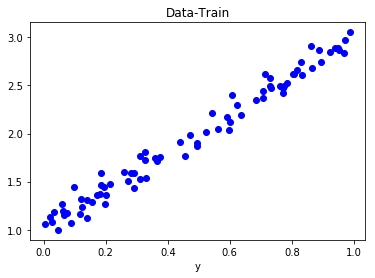

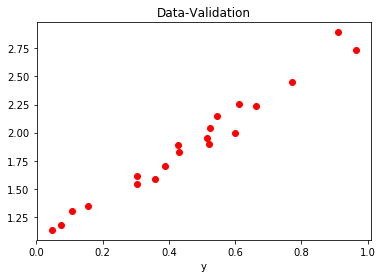

In [1]:
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline


# Data Generation
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]
# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

plt.plot(x_train, y_train, 'bo')
plt.title('Data-Train')
plt.xlabel('x')
plt.xlabel('y')
plt.show()

plt.plot(x_val, y_val, 'ro')
plt.title('Data-Validation')
plt.xlabel('x')
plt.xlabel('y')
plt.show()


## Numpy

In [2]:
# Initializes parameters "a" and "b" randomly
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)

print(' a and b after initialization')
print(a, b)

# Sets learning rate
lr = 1e-1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Computes our model's predicted output
    yhat = a + b * x_train
    
    # How wrong is our model? That's the error! 
    error = (y_train - yhat)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()
    
    # Computes gradients for both "a" and "b" parameters
    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()
    
    # Updates parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad

print(' a and b after gradient descent')    
print(a, b)

# Sanity Check: do we get the same results as our gradient descent?
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print(' a and b by scikit-learn')
print(linr.intercept_, linr.coef_[0])

 a and b after initialization
[0.49671415] [-0.1382643]
 a and b after gradient descent
[1.02354094] [1.96896411]
 a and b by scikit-learn
[1.02354075] [1.96896447]


## Pytorch!

In [3]:
!pip install torchviz  # package for dynamic computation Graph

     |████████████████████████████████| 51kB 10.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


In [4]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

print(torch.__version__)
torch.cuda.is_available()

1.1.0


True

###Loading Data, Devices and CUDA

In [6]:
# switch to False to use CPU
use_cuda = True

use_cuda = use_cuda and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu");


# Our data was in Numpy arrays, but we need to transform them into PyTorch's Tensors
# and then we send them to the chosen device
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

# Here we can see the difference - notice that .type() is more useful
# since it also tells us WHERE the tensor is (device)
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.cuda.FloatTensor


### Dynamic computation graph


The [PyTorchViz](https://github.com/szagoruyko/pytorchviz) package and its make_dot(variable) method allows us to easily visualize a graph associated with a given Python variable.

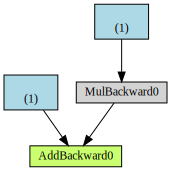

In [9]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

make_dot(yhat)

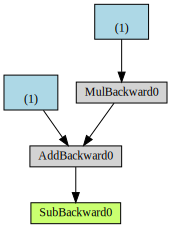

In [10]:
make_dot(error)

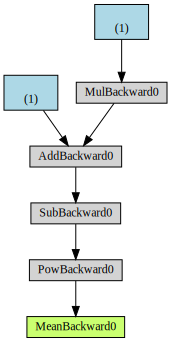

In [11]:
make_dot(loss)

Let’s take a closer look at its components:

* blue boxes: these correspond to the tensors we use as parameters, the ones we’re asking PyTorch to compute gradients for;
* gray box: a Python operation that involves a gradient-computing tensor or its dependencies;
* green box: the same as the gray box, except it is the starting point for the computation of gradients (assuming the backward()method is called from the variable used to visualize the graph)— they are computed from the bottom-up in a graph.


### Autograd 

*(No more manual computation of gradients!)*

[Autograd](https://pytorch.org/docs/stable/autograd) is PyTorch’s automatic differentiation package. Thanks to it, we don’t need to worry about partial derivatives, chain rule or anything like it.

* backward()
* grad()
* no.grad()
* grad.zero()

In [12]:
lr = 1e-1
n_epochs = 1000

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

print(' a and b after initialization')
print(a, b)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()

    # No more manual computation of gradients! 
    # a_grad = -2 * error.mean()
    # b_grad = -2 * (x_tensor * error).mean()
    
    # We just tell PyTorch to work its way BACKWARDS from the specified loss!
    loss.backward()
    # Let's check the computed gradients...
    print(a.grad)
    print(b.grad)
    
    # What about UPDATING the parameters? Not so fast...
    
    # FIRST ATTEMPT
    # AttributeError: 'NoneType' object has no attribute 'zero_'
    # a = a - lr * a.grad
    # b = b - lr * b.grad
    # print(a)

    # SECOND ATTEMPT
    # RuntimeError: a leaf Variable that requires grad has been used in an in-place operation.
    # a -= lr * a.grad
    # b -= lr * b.grad        
    
    # THIRD ATTEMPT
    # We need to use NO_GRAD to keep the update out of the gradient computation
    # Why is that? It boils down to the DYNAMIC GRAPH that PyTorch uses...
    with torch.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad
    
    # PyTorch is "clingy" to its computed gradients, we need to tell it to let it go...
    a.grad.zero_()
    b.grad.zero_()
    
print(' a and b after gradient descent using Pytorch ') 
print(a, b)

 a and b after initialization
tensor([0.6226], device='cuda:0', requires_grad=True) tensor([1.4505], device='cuda:0', requires_grad=True)
tensor([-1.2918], device='cuda:0')
tensor([-0.7076], device='cuda:0')
tensor([-0.9666], device='cuda:0')
tensor([-0.5406], device='cuda:0')
tensor([-0.7222], device='cuda:0')
tensor([-0.4150], device='cuda:0')
tensor([-0.5385], device='cuda:0')
tensor([-0.3205], device='cuda:0')
tensor([-0.4005], device='cuda:0')
tensor([-0.2493], device='cuda:0')
tensor([-0.2969], device='cuda:0')
tensor([-0.1956], device='cuda:0')
tensor([-0.2190], device='cuda:0')
tensor([-0.1552], device='cuda:0')
tensor([-0.1606], device='cuda:0')
tensor([-0.1246], device='cuda:0')
tensor([-0.1167], device='cuda:0')
tensor([-0.1016], device='cuda:0')
tensor([-0.0837], device='cuda:0')
tensor([-0.0841], device='cuda:0')
tensor([-0.0590], device='cuda:0')
tensor([-0.0709], device='cuda:0')
tensor([-0.0405], device='cuda:0')
tensor([-0.0608], device='cuda:0')
tensor([-0.0267], devi

### Optimizer


So far, we’ve been manually updating the parameters using the computed gradients. That’s probably fine for two parameters… but what if we had a whole lot of them?! We use one of PyTorch’s [optimizers](https://pytorch.org/docs/stable/optim.html#module-torch.optim), like [SGD](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD) or [Adam](https://pytorch.org/docs/stable/optim.html#torch.optim.Adam).

* step()  # No more manual update!
* zero_grad() # No more telling PyTorch to let gradients go!

In [14]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

print(' a and b after initialization')
print(a, b)

lr = 1e-1
n_epochs = 1000

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()

    loss.backward()    
    
    # No more manual update!
    # with torch.no_grad():
    #     a -= lr * a.grad
    #     b -= lr * b.grad
    optimizer.step()
    
    # No more telling PyTorch to let gradients go!
    # a.grad.zero_()
    # b.grad.zero_()
    optimizer.zero_grad()
    
print(' a and b after gradient descent using Pytorch') 
print(a, b)

 a and b after initialization
tensor([0.6226], device='cuda:0', requires_grad=True) tensor([1.4505], device='cuda:0', requires_grad=True)
 a and b after gradient descent using Pytorch
tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


### Loss

We now tackle the loss computation. As expected, PyTorch got us covered once again. There are many  [loss](https://pytorch.org/docs/stable/nn.html#loss-functions) functions to choose from, depending on the task at hand. Since ours is a regression, we are using the Mean Square Error (MSE) loss.

Notice that **nn.MSELoss** actually creates a loss function for us — it is NOT the loss function itself. Moreover, you can specify a reduction method to be applied, that is, how do you want to aggregate the results for individual points — you can average them (reduction=’mean’) or simply sum them up (reduction=’sum’)

* nn.MSELoss   # No more manual loss!



In [15]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

print(' a and b after initialization')
print(a, b)

lr = 1e-1
n_epochs = 1000

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    
    # No more manual loss!
    # error = y_tensor - yhat
    # loss = (error ** 2).mean()
    loss = loss_fn(y_train_tensor, yhat)

    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()
    
print(' a and b after gradient descent')
print(a, b)

 a and b after initialization
tensor([0.6226], device='cuda:0', requires_grad=True) tensor([1.4505], device='cuda:0', requires_grad=True)
 a and b after gradient descent
tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


### Model

*No more manual prediction!  forward*

In PyTorch, a model is represented by a regular Python class that inherits from the  [Module](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) class.

The most fundamental methods it needs to implement are:

*  **__init__(self)**: it defines the parts that make up the model —in our case, two parameters, a and b.

> You are not limited to defining parameters, though… models can contain other models (or layers) as its attributes as well, so you can easily nest them. We’ll see an example of this shortly as well.

* **forward(self, x)**: it performs the actual computation, that is, it outputs a prediction, given the input x.

> You should NOT call the forward(x) method, though. You should call the whole model itself, as in model(x) to perform a forward pass and output predictions.

In [0]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # To make "a" and "b" real parameters of the model, we need to wrap them with nn.Parameter
        self.a = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x):
        # Computes the outputs / predictions
        return self.a + self.b * x

**IMPORTANT**: we need to **send our model to the same device where the data is**. If our data is made of GPU tensors, our model must “live” inside the GPU as well.

In [17]:
torch.manual_seed(42)

# Now we can create a model and send it at once to the device
model = ManualLinearRegression().to(device)
# We can also inspect its parameters using its state_dict
print(model.state_dict())

lr = 1e-1
n_epochs = 1000

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    # What is this?!?
    model.train()

    # No more manual prediction!
    # yhat = a + b * x_tensor
    yhat = model(x_train_tensor)
    
    loss = loss_fn(y_train_tensor, yhat)
    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()
    
print(model.state_dict())

OrderedDict([('a', tensor([0.3367], device='cuda:0')), ('b', tensor([0.1288], device='cuda:0'))])
OrderedDict([('a', tensor([1.0235], device='cuda:0')), ('b', tensor([1.9690], device='cuda:0'))])


**What is this?!?**

In PyTorch, models have a **train() method which, somewhat disappointingly, does NOT perform a training step. Its only purpose is to set the model to training mode. Why is this important? Some models may use mechanisms like Dropout, for instance, which have distinct behaviors in training and evaluation phases.**

### Nested Models

In our model, we manually created two parameters to perform a linear regression. Let’s use PyTorch’s [Linear](https://pytorch.org/docs/stable/nn.html#torch.nn.Linear) model as an attribute of our own, thus creating a nested model.

Even though this clearly is a contrived example, as we are pretty much wrapping the underlying model without adding anything useful (or, at all!) to it, it illustrates well the concept.

In the ** __init__ ** method, we created an attribute that contains our nested Linear model.

In the **forward(**) method, we call the nested model itself to perform the forward pass (notice, we are not *calling self.linear.forward(x)*).


In [0]:
class LayerLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # Instead of our custom parameters, we use a Linear layer with single input and single output
        self.linear = nn.Linear(1, 1)
                
    def forward(self, x):
        # Now it only takes a call to the layer to make predictions
        return self.linear(x)

### Sequential Models

For straightforward models, that use run-of-the-mill layers, where the output of a layer is sequentially fed as an input to the next, we can use a  [Sequential](https://pytorch.org/docs/stable/nn.html#torch.nn.Sequential) model 


In [23]:
torch.manual_seed(42)
# Alternatively, you can use a Sequential model
model = nn.Sequential(nn.Linear(1, 1)).to(device)
# We can also inspect its parameters using its state_dict
print(model.state_dict())

OrderedDict([('0.weight', tensor([[0.7645]], device='cuda:0')), ('0.bias', tensor([0.8300], device='cuda:0'))])


### Training Step


So far, we’ve defined an **optimizer**, a **loss function** and a **model**. Scroll up a bit and take a quick look at the code inside the loop. Would it change if we were using a different optimizer, or loss, or even model? If not, how can we make it more generic?

Well, I guess we could say all these lines of code **perform a training step**, given those **three elements (optimizer, loss and model)**,the **features** and the **labels**.


In [25]:
torch.manual_seed(42)
# Alternatively, you can use a Sequential model
model = nn.Sequential(nn.Linear(1, 1)).to(device)
# We can also inspect its parameters using its state_dict
print(model.state_dict())

lr = 1e-1
n_epochs = 1000

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)


def make_train_step(model, loss_fn, optimizer):
    # Builds function that performs a step in the train loop
    def train_step(x, y):
        # Sets model to TRAIN mode
        model.train()
        # Makes predictions
        yhat = model(x)
        # Computes loss
        loss = loss_fn(y, yhat)
        # Computes gradients
        loss.backward()
        # Updates parameters and zeroes gradients
        optimizer.step()
        optimizer.zero_grad()
        # Returns the loss
        return loss.item()
    
    # Returns the function that will be called inside the train loop
    return train_step

# Creates the train_step function for our model, loss function and optimizer
train_step = make_train_step(model, loss_fn, optimizer)
losses = []

# For each epoch...
for epoch in range(n_epochs):
    # Performs one train step and returns the corresponding loss
    loss = train_step(x_train_tensor, y_train_tensor)
    losses.append(loss)
    
# Checks model's parameters
print(model.state_dict())

OrderedDict([('0.weight', tensor([[0.7645]], device='cuda:0')), ('0.bias', tensor([0.8300], device='cuda:0'))])
OrderedDict([('0.weight', tensor([[1.9690]], device='cuda:0')), ('0.bias', tensor([1.0235], device='cuda:0'))])
